In [1]:
import chainer
from chainer import Variable
import pathlib
from discriminator import Discriminator as Dis5_b
from discriminator3 import Discriminator as Dis5_a
from generator import Generator
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze data

In [2]:
# built model
dis5_b = Dis5_b()
dis5_a = Dis5_a()
gen = Generator()

Discriminator aplying Dense to outputlayer
Discriminator applying GAP to output layer


In [3]:
# adapt to gpu
gpu = 0
if gpu >= 0:
    # Make a specified GPU current
    chainer.backends.cuda.get_device_from_id(gpu).use()
    dis5_a.to_gpu()
    dis5_b.to_gpu()
    gen.to_gpu()
xp = gen.xp
xp

<module 'cupy' from '/home/yohei/.pyenv/versions/miniconda3-latest/envs/chainer/lib/python3.6/site-packages/cupy/__init__.py'>

## result5_a_0

In [4]:
# path
dir_path = pathlib.Path("result5_a_0")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

In [5]:
gen_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [6]:
gen_paths, dis_paths

([PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_1034.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_2068.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_3102.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_4136.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_5170.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_6203.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_7237.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_8271.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_9305.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter_10339.npz'),
  PosixPath('/home/yohei/Documents/tlab/face_dcgan.chainer/result5_a_0/gen_iter

In [7]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_a0 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_a)
    acc = []
    for seed in range(5):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_a(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_a0["mean"].append(acc.mean())
    false_acc_a0["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_a0["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.00200
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.01000
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.43800
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.55200
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.64600
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.05600
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.46400
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.40200
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.23200
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.05600
gen: gen_iter_11373.npz    dis: dis_iter_11373.npz
False identification rate:0.32400
gen: gen_iter_12406.npz    dis: dis_iter_12406.npz
False identification rate:0.0700

In [8]:
df_f_acc_a0 = pandas.DataFrame(false_acc_a0)
df_f_acc_a0

,mean,std
0,0.002,0.004000
1,0.010,0.000000
2,0.438,0.041665
3,0.552,0.029933
4,0.646,0.034986
5,0.056,0.004899
6,0.464,0.059532
7,0.402,0.057758
8,0.232,0.024000
9,0.056,0.025768


In [9]:
false_acc_a0["mean"] = np.array(false_acc_a0["mean"])
false_acc_a0["std"] = np.array(false_acc_a0["std"])

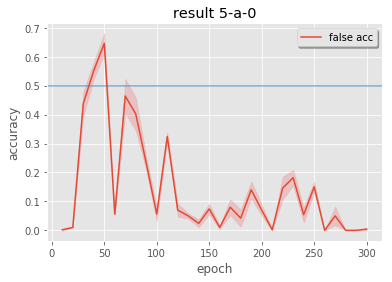

In [10]:
epochs = range(10, 310, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_a0["mean"], label='false acc')
plt.fill_between(
    epochs,
    y1=false_acc_a0["mean"] + false_acc_a0["std"],
    y2=false_acc_a0["mean"] - false_acc_a0["std"], alpha=0.15, color="r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(1), alpha=0.6)
plt.title("result 5-a-0")
plt.legend(frameon=True, shadow=True)

## result5_a_1

In [11]:
# path
dir_path = pathlib.Path("result5_a_1")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

# sort path
gen_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [12]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_a1 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_a)
    acc = []
    for seed in range(5):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_a(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_a1["mean"].append(acc.mean())
    false_acc_a1["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_a1["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.38000
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.05600
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.17400
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.03400
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.00600
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.10600
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.12600
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.06000
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.28200
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.16200
gen: gen_iter_11373.npz    dis: dis_iter_11373.npz
False identification rate:0.14800
gen: gen_iter_12406.npz    dis: dis_iter_12406.npz
False identification rate:0.0240

In [13]:
false_acc_a1["mean"] = np.array(false_acc_a1["mean"])
false_acc_a1["std"] = np.array(false_acc_a1["std"])

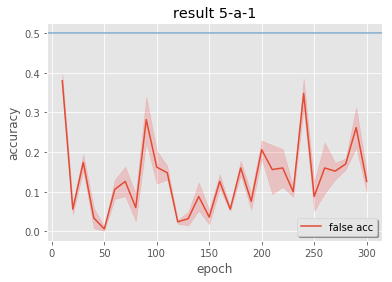

In [14]:
epochs = range(10, 310, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_a1["mean"], label='false acc')
plt.fill_between(
    epochs,
    y1=false_acc_a1["mean"] + false_acc_a1["std"],
    y2=false_acc_a1["mean"] - false_acc_a1["std"], alpha=0.15, color="r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(1), alpha=0.6)
plt.title("result 5-a-1")
plt.legend(frameon=True, shadow=True)

## result5_a_2

In [15]:
# path
dir_path = pathlib.Path("result5_a_2")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

# sort path
gen_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [16]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_a2 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_a)
    acc = []
    for seed in range(5):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_a(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_a2["mean"].append(acc.mean())
    false_acc_a2["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_a2["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.01600
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.29800
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.01400
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.33600
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.27400
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.30800
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.52400
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.10400
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.11400
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.17000
gen: gen_iter_11373.npz    dis: dis_iter_11373.npz
False identification rate:0.19400
gen: gen_iter_12406.npz    dis: dis_iter_12406.npz
False identification rate:0.1540

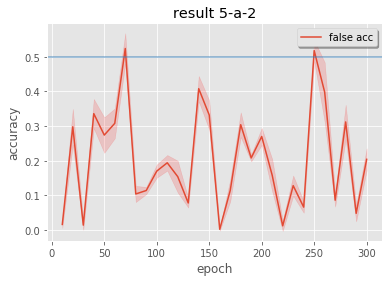

In [17]:
false_acc_a2["mean"] = np.array(false_acc_a2["mean"])
false_acc_a2["std"] = np.array(false_acc_a2["std"])

epochs = range(10, 310, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_a2["mean"], label='false acc')
plt.fill_between(
    epochs,
    y1=false_acc_a2["mean"] + false_acc_a2["std"],
    y2=false_acc_a2["mean"] - false_acc_a2["std"], alpha=0.15, color="r")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(1), alpha=0.6)
plt.title("result 5-a-2")
plt.legend(frameon=True, shadow=True)

## result5_b_0

In [18]:
# path
dir_path = pathlib.Path("result5_b_0")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

# sort path
gen_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [19]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_b0 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_b)
    acc = []
    for seed in range(5):    
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_b(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_b0["mean"].append(acc.mean())
    false_acc_b0["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_b0["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.79200
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.00400
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.00000
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.32800
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.66400
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.18600
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.09800
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.34400
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.19600
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.20800


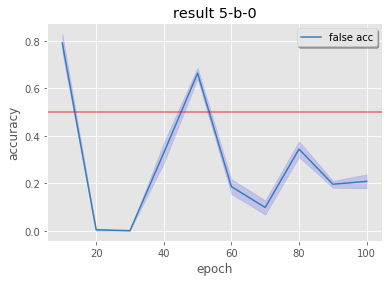

In [20]:
false_acc_b0["mean"] = np.array(false_acc_b0["mean"])
false_acc_b0["std"] = np.array(false_acc_b0["std"])

epochs = range(10, 110, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_b0["mean"], label='false acc', c=plt.cm.Set1(1))
plt.fill_between(
    epochs,
    y1=false_acc_b0["mean"] + false_acc_b0["std"],
    y2=false_acc_b0["mean"] - false_acc_b0["std"],
    alpha=0.15,
    color="b")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(0), alpha=0.6)
plt.title("result 5-b-0")
plt.legend(frameon=True, shadow=True)

## result5_b_1

In [21]:
# path
dir_path = pathlib.Path("result5_b_1")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

# sort path
gen_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [22]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_b1 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_b)
    acc = []
    for seed in range(5):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_b(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_b1["mean"].append(acc.mean())
    false_acc_b1["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_b1["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.06800
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.51400
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.00000
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.24600
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.02200
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.16400
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.35400
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.14000
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.03800
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.05000


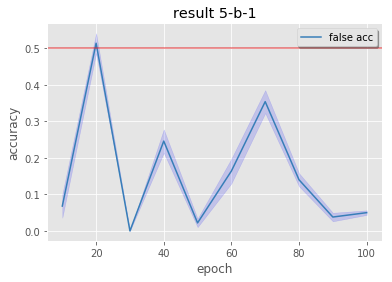

In [23]:
false_acc_b1["mean"] = np.array(false_acc_b1["mean"])
false_acc_b1["std"] = np.array(false_acc_b1["std"])

epochs = range(10, 110, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_b1["mean"], label='false acc', color=plt.cm.Set1(1))
plt.fill_between(
    epochs,
    y1=false_acc_b1["mean"] + false_acc_b1["std"],
    y2=false_acc_b1["mean"] - false_acc_b1["std"],
    alpha=0.15,
    color="b")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(0), alpha=0.6)
plt.title("result 5-b-1")
plt.legend(frameon=True, shadow=True)

## result5_b_2

In [24]:
# path
dir_path = pathlib.Path("result5_b_2")
dir_path_abs = dir_path.resolve()
gen_paths = []
dis_paths = []
for path in dir_path_abs.glob("gen*.npz"):
    gen_paths.append(path)
for path in dir_path_abs.glob("dis*.npz"):
    dis_paths.append(path)

# sort path
gen_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))
dis_paths.sort(
    key=lambda path: int(path.parts[-1].split("_")[-1].split(".")[0]))

In [25]:
# calculate accuracy of Discriminator against Generator
n_images = 100
false_acc_b2 = {"mean": [], "std": []}
for gen_path, dis_path in zip(gen_paths, dis_paths):
    print("gen:", gen_path.parts[-1], "   dis:", dis_path.parts[-1])
    # load model
    chainer.serializers.load_npz(file=gen_path, obj=gen)
    chainer.serializers.load_npz(file=dis_path, obj=dis5_b)
    acc = []
    for seed in range(5):
        # make noize(code)
        xp.random.seed(seed)
        np.random.seed(seed)
        z = Variable(xp.asarray(gen.make_hidden(n_images)))
        with chainer.using_config('train', False):
            with chainer.using_config('enable_backprop', False):
                x = gen(z)
                logits = dis5_b(x)
        acc.append(len(logits.data[logits.data > 0]) / 100)
    acc = np.array(acc)
    false_acc_b2["mean"].append(acc.mean())
    false_acc_b2["std"].append(acc.std())
    print("False identification rate:{:.5f}".format(false_acc_b2["mean"][-1]))

gen: gen_iter_1034.npz    dis: dis_iter_1034.npz
False identification rate:0.03800
gen: gen_iter_2068.npz    dis: dis_iter_2068.npz
False identification rate:0.67600
gen: gen_iter_3102.npz    dis: dis_iter_3102.npz
False identification rate:0.06000
gen: gen_iter_4136.npz    dis: dis_iter_4136.npz
False identification rate:0.06000
gen: gen_iter_5170.npz    dis: dis_iter_5170.npz
False identification rate:0.03800
gen: gen_iter_6203.npz    dis: dis_iter_6203.npz
False identification rate:0.17200
gen: gen_iter_7237.npz    dis: dis_iter_7237.npz
False identification rate:0.15000
gen: gen_iter_8271.npz    dis: dis_iter_8271.npz
False identification rate:0.07400
gen: gen_iter_9305.npz    dis: dis_iter_9305.npz
False identification rate:0.39200
gen: gen_iter_10339.npz    dis: dis_iter_10339.npz
False identification rate:0.03800


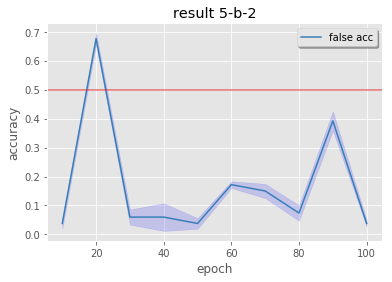

In [26]:
false_acc_b2["mean"] = np.array(false_acc_b2["mean"])
false_acc_b2["std"] = np.array(false_acc_b2["std"])

epochs = range(10, 110, 10)
plt.style.use("ggplot")
plt.plot(epochs, false_acc_b2["mean"], label='false acc', color=plt.cm.Set1(1))
plt.fill_between(
    epochs,
    y1=false_acc_b2["mean"] + false_acc_b2["std"],
    y2=false_acc_b2["mean"] - false_acc_b2["std"],
    alpha=0.15,
    color="b")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.axhline(y=0.5, color=plt.cm.Set1(0), alpha=0.6)
plt.title("result 5-b-2")
plt.legend(frameon=True, shadow=True)

# Preparing the graph

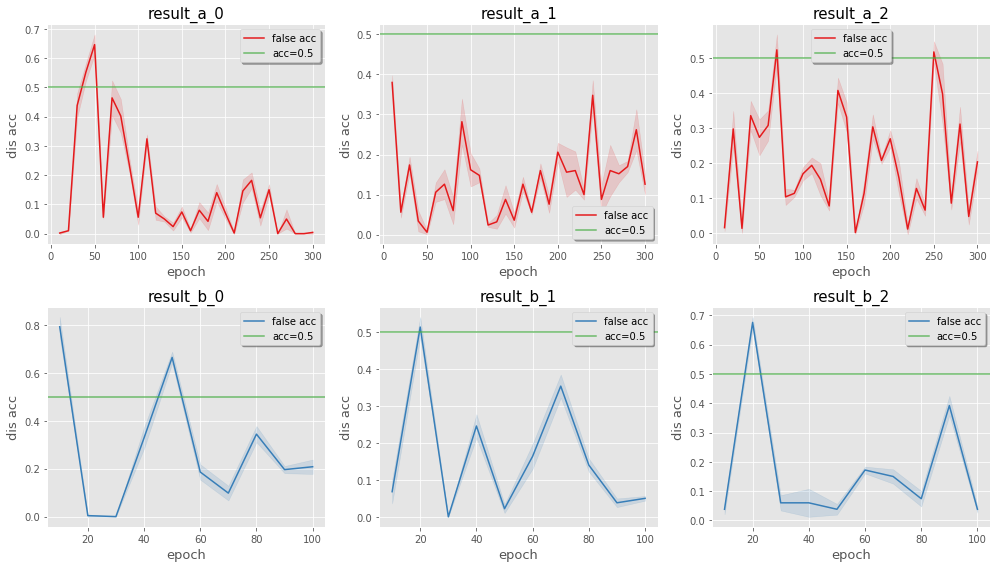

In [54]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
i = 0
for ax, false_acc in zip(axes.flat, [
        false_acc_a0, false_acc_a1, false_acc_a2, false_acc_b0, false_acc_b1,
        false_acc_b2
]):
    if i < 3:
        epochs = range(10, 310, 10)
        color1 = plt.cm.Set1(0)
        color2 = plt.cm.Set1(2)
        title="result_a_{:}".format(i)
    else:
        epochs = range(10, 110, 10)
        color1 = plt.cm.Set1(1)
        color2 = plt.cm.Set1(2)
        title="result_b_{:}".format(i-3)

    ax.plot(epochs, false_acc['mean'], color=color1, label="false acc")
    ax.fill_between(
    epochs,
    y1=false_acc["mean"] + false_acc["std"],
    y2=false_acc["mean"] - false_acc["std"],
    alpha=0.15,
    color=color1)
    ax.axhline(y=0.5, color=color2, alpha=0.8, label="acc=0.5")
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("epoch", fontsize=13)
    ax.set_ylabel("dis acc", fontsize=13)
    i += 1
    ax.legend(frameon=True, shadow=True)
plt.tight_layout()
fig.savefig("ex5_loss.png")